**5.1** Calculate mean daily return and daily standard deviation, and annualize them to obtain expected annual return and volatility.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pvr = pd.read_csv('data/Small_Cap/PVR.csv')
pvr = pvr[pvr['Series']=='EQ']
pvr['DailyReturn'] = pvr['Close Price'].pct_change().fillna(0)   # daily returns, daily percentage change (multiply by 100 for result in %)

dailyMeanPVR = pvr['DailyReturn'].mean()
dailyStDevPVR = pvr['DailyReturn'].std()

annualMeanPVR = dailyMeanPVR*252
annualStdDevPVR = dailyStDevPVR*np.sqrt(252)

print('Mean Expected Annual Return % :',annualMeanPVR*100,'    Annual Volatility % :',annualStdDevPVR*100)

Mean Expected Annual Return % : 11.086480124052587     Annual Volatility % : 30.98835041377322


**5.2** Choose 5 stocks. Assuming they have same weights, calculate annual return and volatility.

In [3]:
axis = pd.read_csv('data/Large_Cap/AXISBANK.csv')
axis = axis[axis['Series']=='EQ']
apollo = pd.read_csv('data/Mid_Cap/APOLLOTYRE.csv')
apollo = apollo[apollo['Series']=='EQ']
relinfra = pd.read_csv('data/Mid_Cap/RELINFRA.csv')
relinfra = relinfra[relinfra['Series']=='EQ']
fortis = pd.read_csv('data/Small_Cap/FORTIS.csv')
fortis = fortis[fortis['Series']=='EQ']

dailyReturn = pd.DataFrame({'axis':axis['Close Price'].pct_change(),'apollo':apollo['Close Price'].pct_change(),'relinfra':relinfra['Close Price'].pct_change(),'fortis':fortis['Close Price'].pct_change(),'pvr':pvr['DailyReturn']})
dailyReturn.dropna()

weights = np.array([[0.2],[0.2],[0.2],[0.2],[0.2]])    # weights
annualReturn = dailyReturn.mean()*252   # contains annual returns of the five stocks
covMat = dailyReturn.cov()    # covariance between two stocks, covariance with itself is nothing but the variance

portfolioReturn = annualReturn.mean()   # since all are of equal weights, hence the mean. multiply by 100 for result in %
portfolioVolatility = np.sqrt(weights.T.dot(covMat.dot(weights))[0,0])*np.sqrt(252)

print('Returns % :',portfolioReturn*100,'     Volatility % :',portfolioVolatility*100)

Returns % : -12.326133988170877      Volatility % : 20.8867097716615


**5.3** Prepare a scatter plot on the basis of different weights for the stocks of the portfolio. Color the data points based on the sharpe ratio.

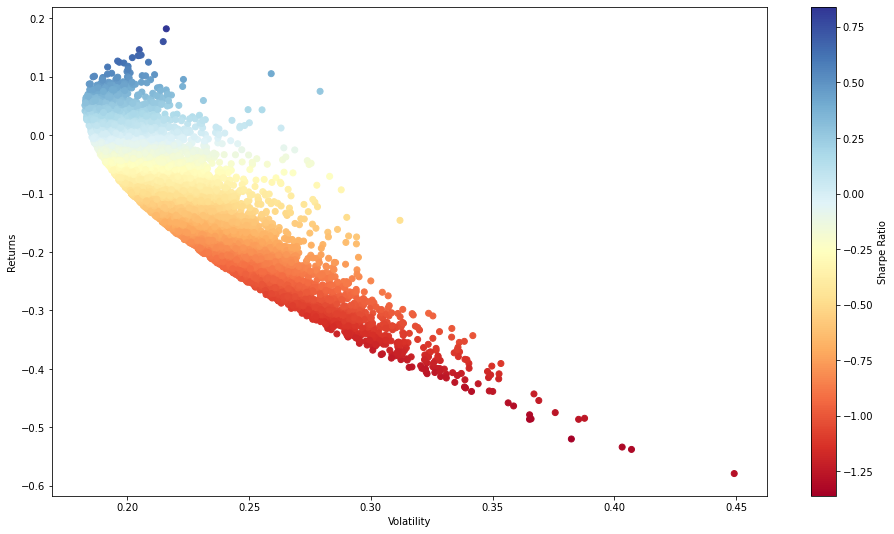

In [16]:
n_samples = 10000   # to generate random weights
weights = np.random.random_sample((n_samples,5))
portfolio = pd.DataFrame()    # i pronounce it a dataframe

for i in range(n_samples):    # there has to be something better than this for loop, vaguely slow
  weights[i] = weights[i]/weights[i].sum()
  portfolio.loc[i,'return'] = np.sum(weights[i]*annualReturn)
  portfolio.loc[i,'volatility'] = np.sqrt(weights[i].T.dot(covMat.dot(weights[i])))* np.sqrt(252)

portfolio['sharpe'] = portfolio['return']/portfolio['volatility']   # created a column for sharpe ratio
plt.figure(figsize=(16,9))
plt.scatter(portfolio['volatility'],portfolio['return'],c=portfolio['sharpe'],cmap='RdYlBu')
cbar = plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
cbar.set_label('Sharpe Ratio')
plt.show()

**5.4** Mark the two portfolios where :
* Sharpe Ratio is the highest
* Volatility is the lowest

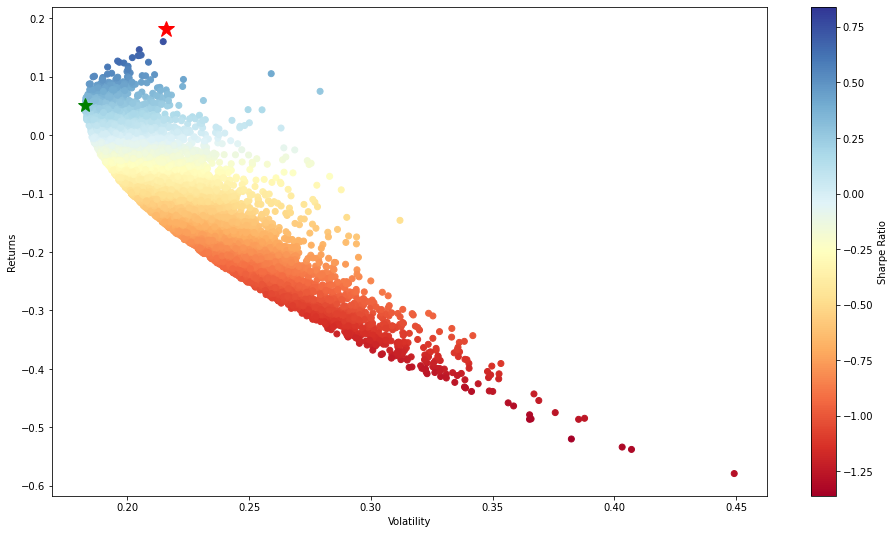

In [17]:
maxSharpe = portfolio.iloc[portfolio['sharpe'].idxmax()]
minVolatility = portfolio.iloc[portfolio['volatility'].idxmin()]

plt.figure(figsize=(16,9))
plt.scatter(portfolio['volatility'],portfolio['return'],c=portfolio['sharpe'],cmap='RdYlBu')
plt.plot(maxSharpe['volatility'],maxSharpe['return'],'r*',ms=17)
plt.plot(minVolatility['volatility'],minVolatility['return'],'g*',ms=14)    # ms is marker size
cbar = plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
cbar.set_label('Sharpe Ratio')
plt.show()